In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def symbol_to_path(symbol, base_dir="data"):
    return  base_dir + "/{}.csv".format(str(symbol))
print(symbol_to_path("IBM"))

data/IBM.csv


In [3]:
def get_data(symbols, dates):
    '''
    Получает цену акций (Adj Close) для данного symbol из CSV файла
    '''
    # Создаем пустой датафрейм и удостоверимся, что SPY будет на первом месте
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', usecols=['Date', 'Adj Close'], parse_dates=True, na_values=['nan']) 
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp, how='inner')
    return df

def plot_df(df, title='Цены на акции'):
    '''Рисует графики цен всего DataFrame'''
    df.plot(title=title, fontsize=11)
    plt.xlabel('Дата')
    plt.ylabel('Цены')
    plt.show()

def plot_selected(df, columns, start_index, end_index):
    '''Рисует графики цен указанных столбцов'''
    df.loc[start_index:end_index, columns].plot(title='Цены на акции', fontsize=11)
    plt.xlabel('Дата')
    plt.ylabel('Цены')
    plt.show()    
    
def normalize_data(df):
    '''Нормализует весь датафрэйм для отображения изменения цен.'''
    df = df / df.iloc[0, :]
    return df

In [4]:
def test_try():
    # Указываем временной промежуток
    start_period = '2010-01-22'
    end_period = '2010-01-26'
    
    # Создаем список тайм объектов
    dates = pd.date_range(start_period, end_period)
    
    # Создаём пустой датафрейм, в столбце индексов которого тайм объекты
    df = pd.DataFrame(index=dates)
    
    # Подгружаем индекс S&P500, вместо столбца индексов пишем столбец дат.
    dfSPY =  pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'])
    dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
    
    # Параметр how='inner' позволяет избавиться от NaN значений в подгрузке
    df = df.join(dfSPY, how='inner')
    
    # Желаем добавить в наш DF новые акции:
    ticks = ['AAPL', 'GOOG', 'IBM']
    
    get_data(ticks, dates)
    return df
    

In [5]:
# Указываем временной промежуток
start_period = '2010-01-01'
end_period = '2010-01-26'
    
# Создаем список тайм объектов
dates = pd.date_range(start_period, end_period)

ticks = ['AAPL', 'GOOG', 'IBM']
get_data(ticks, dates).head()

,SPY,AAPL,GOOG,IBM
2010-01-04,93.675278,26.782711,312.204773,99.299347
2010-01-05,93.923241,26.829010,310.829926,98.099792
2010-01-06,93.989357,26.402260,302.994293,97.462532
2010-01-07,94.386139,26.353460,295.940735,97.125160
2010-01-08,94.700218,26.528664,299.885956,98.099792


### Slicing

In [103]:
def main():
    # Определим временные границы
    dates = pd.date_range('2010-01-01', '2012-12-31')
    
    # Опишем тикеры
    tickers = ['AAPL', 'GOOG', 'IBM']
    
    df = get_data(tickers, dates)
    
    return df
    

In [121]:
# Выбираем конкретные даты
print(main().loc['2010-01-24':'2010-01-31'])

# Выбираем конкретные даты и компании
print(main().loc['2010-01-24':'2010-01-31', ['SPY', 'AAPL']])

                  SPY       AAPL        GOOG        IBM
2010-01-25  90.732674  25.413599  268.991760  94.553688
2010-01-26  90.352448  25.772774  270.197235  94.276276
2010-01-27  90.782265  26.015560  270.037842  94.711105
2010-01-28  89.740784  24.940546  266.147400  92.776848
2010-01-29  88.765427  24.035734  263.980530  91.757233
                  SPY       AAPL
2010-01-25  90.732674  25.413599
2010-01-26  90.352448  25.772774
2010-01-27  90.782265  26.015560
2010-01-28  89.740784  24.940546
2010-01-29  88.765427  24.035734


In [126]:
# Можно делать слайсинг по названиям столбцов
main()[['SPY', 'IBM']]

,SPY,IBM
2010-01-04,93.675278,99.299347
2010-01-05,93.923241,98.099792
2010-01-06,93.989357,97.462532
2010-01-07,94.386139,97.125160
2010-01-08,94.700218,98.099792
2010-01-11,94.832466,97.072685
2010-01-12,93.948021,97.844872
2010-01-13,94.741539,97.634964
2010-01-14,94.997765,99.194389
2010-01-15,93.931488,98.797028


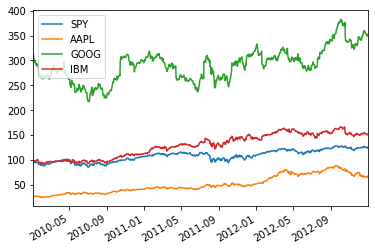

In [169]:
df.plot();

### Как происходило изменение самих цен в рамках каждой из бумаг?

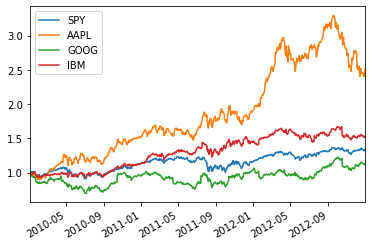

In [132]:
# Посчитаем как изменялась цена со временем, относительно своего изначального значения
df = main()
df1 = df / df.iloc[0, :]
df1.plot()
plt.show()

In [135]:
df1.head()

,SPY,AAPL,GOOG,IBM
2010-01-04,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.002647,1.001729,0.995596,0.987920
2010-01-06,1.003353,0.985795,0.970499,0.981502
2010-01-07,1.007589,0.983973,0.947906,0.978105
2010-01-08,1.010941,0.990515,0.960543,0.987920


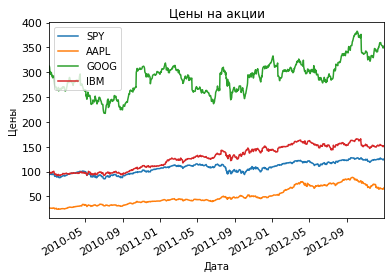

In [161]:
plot_df(df)

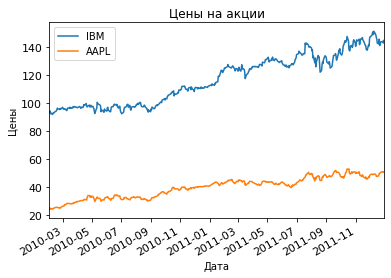

In [163]:
plot_selected(df, ['IBM', 'AAPL'], '2010-02-01', '2012-01-01')

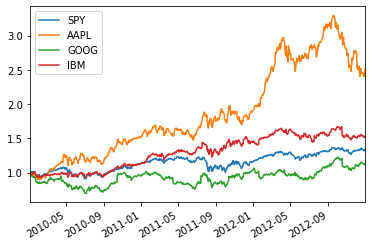

In [168]:
normalize_data(df).plot();